In [3]:
import pandas as pd

df = pd.read_csv('creditcard.csv.crdownload')

print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
missing_values = df.isnull().sum()

In [5]:
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
missing_summary = df.isnull().mean() * 100 

In [7]:
missing_summary

Time      0.000000
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.008573
V13       0.008573
V14       0.008573
V15       0.008573
V16       0.008573
V17       0.008573
V18       0.008573
V19       0.008573
V20       0.008573
V21       0.008573
V22       0.008573
V23       0.008573
V24       0.008573
V25       0.008573
V26       0.008573
V27       0.008573
V28       0.008573
Amount    0.008573
Class     0.008573
dtype: float64

In [8]:
df.fillna(0, inplace=True)

In [9]:
df.dropna(inplace=True)

In [13]:
df["Amount"].describe()

count    11665.000000
mean        62.789749
std        179.810014
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [15]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])

In [16]:
non_fraud

11616

In [17]:
fraud

49

In [18]:
fraud_percent = (fraud / (fraud + non_fraud)) * 100

In [19]:
fraud_percent

0.42006000857265324

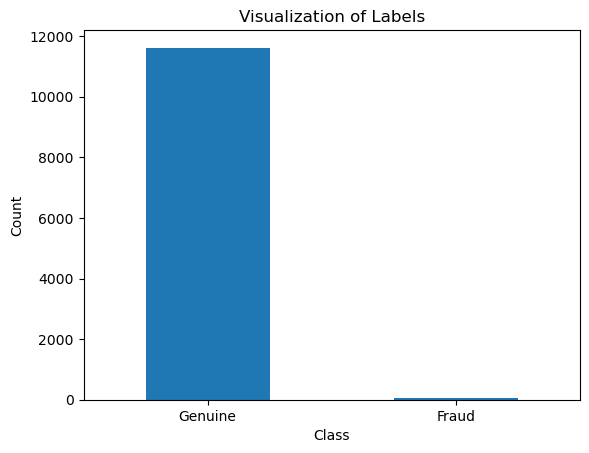

In [20]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [36]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount'],
      dtype='object')

In [37]:
if 'Amount' in df.columns:
    scaler = StandardScaler()
    df['NormalizedAmount'] = scaler.fit_transform(df[['Amount']])
    print(df[['Amount', 'NormalizedAmount']].head())
else:
    print("Column 'Amount' is not present in the DataFrame.")

Column 'Amount' is not present in the DataFrame.


In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])  
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.482921
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.334255
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.756764
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.337650
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.040045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,0.291495,...,-0.126197,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,-0.293599
11661,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,0.176953,...,-0.125651,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,-0.321407
11662,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,-0.608412,...,-0.106545,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,-0.293599
11663,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,-0.285711,...,0.003762,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,-0.293599


In [41]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11660    0.0
11661    0.0
11662    0.0
11663    0.0
11664    0.0
Name: Class, Length: 11665, dtype: float64

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [45]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [48]:
dt_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
rf_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
dt_accuracy = dt_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

In [50]:
dt_accuracy

0.9985714285714286

In [51]:
rf_accuracy

0.9994285714285714

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

dt_report = classification_report(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

rf_report = classification_report(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

In [53]:
dt_report 

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      3483\n         1.0       0.83      0.88      0.86        17\n\n    accuracy                           1.00      3500\n   macro avg       0.92      0.94      0.93      3500\nweighted avg       1.00      1.00      1.00      3500\n'

In [ ]:
dt_conf_matrix